# Modeling Temporary Impact $g_t(x)$

This notebook contains experients with the generated slippage data to model the temporary impact function $g_t(x)$.

## Index:
0. Setup and Config
1. Load simulated slippage data
2. Clean data
3. Explore data


## Setup

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Slippage Data

In [32]:
impacts_csv = "../data/processed/impacts_20250731_024948.csv"


df = pd.read_csv(impacts_csv, parse_dates=['ts'])
print("Loaded data with shape:", df.shape)

df.tail()

Loaded data with shape: (39336631, 5)


,ticker,ts,size,slippage,spread
39336626,SOUN,2025-05-02 19:59:59.991539809+00:00,5,0.00500,0.01
39336627,SOUN,2025-05-02 19:59:59.991539809+00:00,50,0.00500,0.01
39336628,SOUN,2025-05-02 19:59:59.991539809+00:00,100,0.00500,0.01
39336629,SOUN,2025-05-02 19:59:59.991539809+00:00,500,0.01068,0.01
39336630,SOUN,2025-05-02 19:59:59.991539809+00:00,1000,0.01284,0.01


## Data Cleaning

In [46]:
# drop zero/negative slippage
df = df[df['slippage'] > 0]

# drop rows with any NaNs in key columns
df.dropna(subset=['ticker','size','slippage','spread'], inplace=True)


print("Tickers:", df['ticker'].unique())

# row counts per ticker
print(df['ticker'].value_counts().rename_axis('ticker').reset_index(name='count'))

Tickers in dataset: ['FROG']
  ticker    count
0   FROG  2874625


## Exploratory Data Analysis

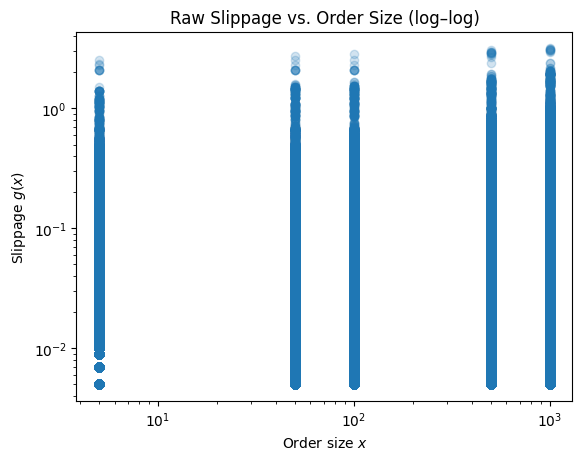

In [44]:
plt.scatter(df['size'], df['slippage'], alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Order size $x$')
plt.ylabel('Slippage $g(x)$')
plt.title('Raw Slippage vs. Order Size (log–log)')
plt.show()

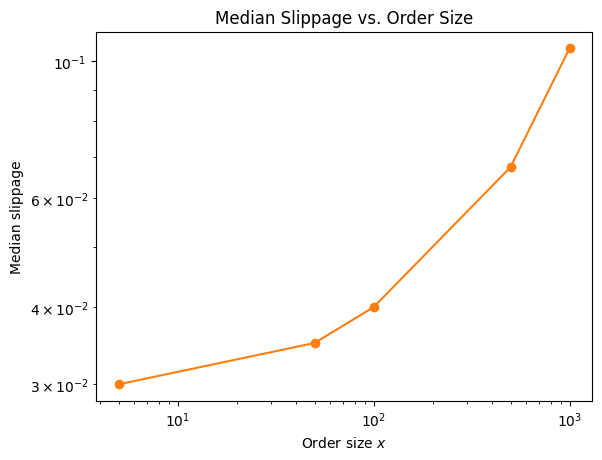

In [45]:
median_df = df.groupby('size')['slippage'].median().reset_index()
plt.plot(median_df['size'], median_df['slippage'], 'o-', color='C1')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Order size $x$')
plt.ylabel('Median slippage')
plt.title('Median Slippage vs. Order Size')
plt.show()